# Imports

All you need for plotting is `matplotlib.pyplot`. `numpy` will be used to create artificial data.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

`%matplotlib inline` is notbook magic to show plots like normal output below notebook cells. This won't work in normal python scripts. To view plots when using normal python scripts use `plt.show()` at the end of creating your plot.

# Data
For the first plot we will use a 1D-array of size [10000] called `data`. Its entries are draw from a gaussian with $\mathcal{N}(\mu=0, \sigma=0.5)$ Later we use similar sets called `subset_1` and `2` with a entries drawn from gaussians with mean $\mu=-1$ and $\mu=1$.

In [348]:
size = 1000000
data = np.random.normal(0, 0.5, size=[size])
subset_1 = np.random.normal(-1, 0.5, size=[size])
subset_2 = np.random.normal(1, 0.5, size=[size])

print data.shape

(1000000,)


# Histogram

(array([  4.50000000e+01,   1.57700000e+03,   2.33240000e+04,
          1.38002000e+05,   3.35047000e+05,   3.35388000e+05,
          1.40431000e+05,   2.43660000e+04,   1.77300000e+03,
          4.70000000e+01]),
 array([-2.44257507, -1.95477287, -1.46697067, -0.97916847, -0.49136627,
        -0.00356407,  0.48423813,  0.97204033,  1.45984254,  1.94764474,
         2.43544694]),
 <a list of 10 Patch objects>)

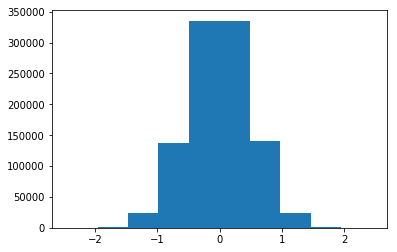

In [351]:
plt.hist(data)

## The most important commands

### TODO:
Here: xkcd relationship no axis labels

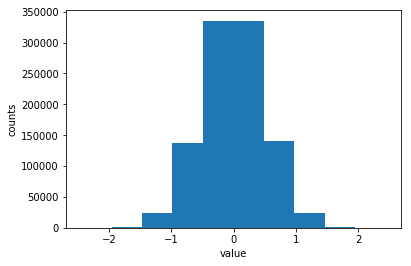

In [352]:
plt.hist(data)
plt.xlabel('value')
plt.ylabel('counts')

## Customizations: 

Change
- the color of the bars by passing the `fc=color` keyword. The color can be a string with the name of the color, e.g. `'red'`, but also an `rgb` or even `rgba` array like `[0, 0, 1]` or `[0, 0, 1, 0.5]`. Alternatively you can also pass in a string with the hexadecimal description of a color, as is usual when working with web colors.
- the edgecolor by passing `ec=color` kwarg
- the number of bins by passing the start and stop values for the bins as an array
- the color of bar number three using `plt.setp()` to set arbitrary properties of elements in the plot

Add
-labels for each axis!

Did we really set the bins?
Yes!


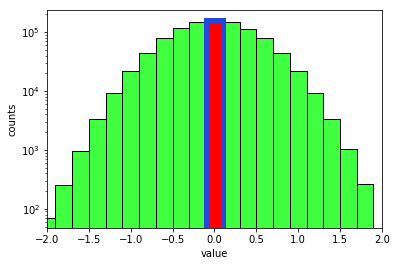

In [368]:
# Customizations via kwarg
step = 0.2
custom_bins = np.arange(-2-0.5*step, 2+0.5*step, step=step)
facecolor = [0, 1, 0, 0.75]
edgecolor='black'

# Drawing the histogram
counts, bins, patches = plt.hist(data, 
                                 fc=facecolor, 
                                 ec=edgecolor, 
                                 bins=custom_bins)
print 'Did we really set the bins?\n{}!'.format('Yes' if np.all(bins == custom_bins) else 'No')

# Additional customizations after drawing
_ = plt.setp(patches[10], fc='red', ec=np.random.uniform(size=3), lw=5, zorder=10)

# Adusting the layout
plt.xlim(-2, 2)
plt.xlabel('value')
plt.ylabel('counts')
plt.yscale('log')

## Multiple datasets
Passing severeal plt.hist() commands will put all these histograms into the same axes.
To create a legend one has to pass a `label` together with each dataset and call `plt.legend()` in the end.

In [192]:
plt.hist(subset_1, alpha=0.5, ec='k', label='subset 1')
plt.hist(subset_2, alpha=0.5, ec='k', label='subset 2')
plt.legend()
plt.xlabel('x')
plt.ylabel('counts')
plt.title('Two gaussians')

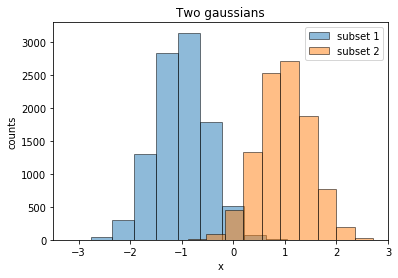

In [193]:
reusable_plot()